This Notebook will serve as the place where I do any analysis from the IMAP-Lo EMv1 testing.
including the firstlight test at PU and beam testing at UNH. The PU test was done with a beam centered on 5keV kinetic energy. The last several tests will be used to compare the speactra from a 16 keV beam and were carried out at UNH.


First we start with a comparison between simulations and PU data. 

In [1]:
%matplotlib ipympl

In [2]:
#######################################Import Cell##################################


# This cell has all the functions used in importing and cleaning data and simulations, including simple plotting routines.


def get_sim_arr(rel_file_path):
    import numpy
    sim_arr=numpy.genfromtxt(rel_file_path, delimiter=',')
    
    return sim_arr


def Trips_sim_by_spec(species, energy=16):
    import glob
    import numpy
    import os
    
    print(species)
    size=numpy.zeros((0))
    for ion in species:
        print(ion,len(glob.glob("./"+str(energy)+"ke*/"+ion+"/tri*.txt", recursive=True)),glob.glob("./"+str(energy)+"ke*/"+ion+"/tri*.txt", recursive=True))
        cond=len(glob.glob("./"+str(energy)+"ke*/"+ion+"/tri*.txt", recursive=True))
        print(cond==0)
        if cond != 0:
            filepath=os.path.normpath(glob.glob("./"+str(energy)+"ke*/"+ion+"/tri*.txt", recursive=True)[0])
            print(filepath)
            dat=numpy.genfromtxt(filepath, delimiter=',')
            print(dat.shape)
            size=numpy.append(size,dat.shape)
        else:
            dir_lst= glob.glob("./"+str(energy)+"ke*/*/", recursive = True)
            sep='\n'
            dir_str=sep.join(dir_lst)
            print(dir_lst)
            raise  Exception(dir_str+""" \n There are no simulations available at this energy and for this species. 
                      Please check the directories above for available species at this energy.  """)
    print(size )
        
    for ion in species:
        if ion==species[0]:
            sim_dat=numpy.zeros((int(numpy.amax(size))+2,3,len(species)))
            print(sim_dat.shape)
            combo_dat=numpy.empty((0,3))                
        filepath=os.path.normpath(glob.glob("./"+str(energy)+"ke*/"+ion+"/tri*.txt", recursive=True)[0])
        
        ion_dat=numpy.genfromtxt(filepath, delimiter=',')
        print(species.index(ion))
        sim_dat[:ion_dat.shape[0],:, species.index(ion)]=ion_dat.copy()
        combo_dat=numpy.append(combo_dat,ion_dat, axis=0)
    print(sim_dat.shape, combo_dat.shape)
    return sim_dat, combo_dat


################ GET Data From DE RAW #########################
def get_data_from_csv(rel_file_path):
    import numpy 
    
    
    tof0=numpy.empty((0))
    valstrt0=numpy.empty((0))
    valstp0=numpy.empty((0))
    valtof0=numpy.empty((0))
    
    tof1=numpy.empty((0))
    valstrt1=numpy.empty((0))
    valstp1=numpy.empty((0))
    valtof1=numpy.empty((0))
    
    tof2=numpy.empty((0))
    valstrt2=numpy.empty((0))
    valstp2=numpy.empty((0))
    valtof2=numpy.empty((0))
    
    
    tof3=numpy.empty((0))
    valstrt3=numpy.empty((0))
    valstp3=numpy.empty((0))
    valtof3=numpy.empty((0))
    
    
    dat=numpy.genfromtxt(filename, delimiter=',', names=True)
    
    for name in dat.dtype.names:
        #print(name[:11])
        if name[:4]=='TOF0':
            tof0=numpy.append(dat[name],tof0)
        if name[:11]=='VALIDSTART0':
            valstrt0=numpy.append(dat[name],valstrt0)
        if name[:10]=='VALIDSTOP0':
            valstp0=numpy.append(dat[name],valstp0)
        if name[:9]=='VALIDTOF0':
            valtof0=numpy.append(dat[name],valtof0)
            
            
        if name[:4]=='TOF1':
            tof1=numpy.append(dat[name],tof1)
        if name[:11]=='VALIDSTART1':
            valstrt1=numpy.append(dat[name],valstrt1)
        if name[:10]=='VALIDSTOP1':
            valstp1=numpy.append(dat[name],valstp1)
        if name[:9]=='VALIDTOF1':
            valtof1=numpy.append(dat[name],valtof1)
            
            numpy.append
        if name[:4]=='TOF2':
            tof2=numpy.append(dat[name],tof2)
        if name[:11]=='VALIDSTART2':
            valstrt2=numpy.append(dat[name],valstrt2)
        if name[:10]=='VALIDSTOP2':
            valstp2=numpy.append(dat[name],valstp2)
        if name[:9]=='VALIDTOF2':
            valtof2=numpy.append(dat[name],valtof2)
            
            
        if name[:4]=='TOF3':
            tof3=numpy.append(dat[name],tof3)
        if name[:11]=='VALIDSTART3':
            valstrt3=numpy.append(dat[name],valstrt3)
        if name[:10]=='VALIDSTOP3':
            valstp3=numpy.append(dat[name],valstp3)
        if name[:9]=='VALIDTOF3':
            valtof3=numpy.append(dat[name],valtof3)
        
        
        
    dat_arr=numpy.empty((tof3.shape[0],17))
    dat_arr[:,0] = valstrt0.copy()
    dat_arr[:,1] = valstp0.copy()
    dat_arr[:,2] = valtof0.copy()
    dat_arr[:,3] = tof0.copy()
    dat_arr[:,4] = valstrt1.copy()
    dat_arr[:,5] = valstp1.copy()
    dat_arr[:,6] = valtof1.copy()
    dat_arr[:,7] = tof1.copy()
    dat_arr[:,8] = valstrt2.copy()
    dat_arr[:,9] = valstp2.copy()
    dat_arr[:,10] = valtof2.copy()
    dat_arr[:,11] = tof2.copy()
    dat_arr[:,12] = valstrt3.copy()
    dat_arr[:,13] = valstp3.copy()
    dat_arr[:,14] = valtof3.copy()
    dat_arr[:,15] = tof3.copy()
    dat_arr[:,16]=dat_arr[:,15]+dat_arr[:,3]-dat_arr[:,7]-dat_arr[:,11] #checksum

    return dat_arr

###################Function to clean the data #####################

# This functions accepts input arrays in the format produced by the 
# get_data_from_csv() function. This function takes one required 
# argument which is the data array. The other options are

#valvalarr = a list with flag values for [tof0,tof1,tof2,tof3] each being either 1 or 0
#chksm_flg = Flag that sets the checksum threashfold when true . This should be used for golden triples only.
#chksm_cut = This is the threshold used when chksm_flg is True
def clean_dat(dat,valarr=[1,1,1,1],chksm_flg= True, chksm_cut=1):
    # Import numpy to handle arrays.
    import numpy
    
    # Check the chksm_flg list and clean the data array. This is done with 
    # conditions applied one flag at a time. When a chksm_flg element is set to 1 
    # start, stop and tof need to be 1 for the event to make the cut.
    if valarr[0]==1:
        dat=dat[dat[:,0]==1,:]
        dat=dat[dat[:,1]==1,:]
        dat=dat[dat[:,2]==1,:]
    if valarr[1]==1:
        dat=dat[dat[:,4]==1,:]
        dat=dat[dat[:,5]==1,:]
        dat=dat[dat[:,6]==1,:]
    if valarr[2]==1:
        dat=dat[dat[:,8]==1,:]
        dat=dat[dat[:,9]==1,:]
        dat=dat[dat[:,10]==1,:]
    if valarr[3]==1:
        dat=dat[dat[:,12]==1,:]
        dat=dat[dat[:,13]==1,:]
        dat=dat[dat[:,14]==1,:]
        
    # Apply checksum threashold.
    if chksm_flg==True:
        dat=dat[numpy.absolute(dat[:,16])<chksm_cut, :]
        
    return dat



def plot_check_sum(rel_file_path,zoom=False, runname='Unamed Run', axis='None', save=True, bnrange=(-10,10)):
    
    dat=get_data_from_csv(rel_file_path)
    dat=clean_dat(dat,valarr=[1,1,1,1],chksm_flg= False)
    checksum=dat[:,16].copy()
    if axis=='None':
        fig, ax = matplotlib.pyplot.subplots()
        ax.set_title(runname)   
    else:
        ax = axis
    
    
    if zoom==True:
        ax.hist(checksum, bins=400, range=bnrange)
        ax.set_xlabel('Checksum (nsec)')
        ax.set_ylabel('Counts in Bin(Bin Width = 1 nsec)')
        ax.set_xlim(-2,2)
        if save==True:
            fig.savefig(plot_filename+'_TOF3_zoom5x.png')
    else:
        ax.hist(checksum, bins=20, range=bnrange)
        ax.set_xlabel('Checksum (nsec)')
        ax.set_ylabel('Counts in Bin(Bin Width = 1 nsec)')
        ax.set_xlim(-10,10)
        if save==True:
            fig.savefig(plot_filename+'_TOF3_zoom5x.png')

        
        
def plot_tof_3(rel_file_path,zoom=0, plot_filename='Unamed Run', axis='None', save=False):
    
    dat=get_data_from_csv(rel_file_path)
    dat=clean_dat(dat,valarr=[0,0,0,0],chksm_flg= False)
    tof3=dat[:,15].copy()
    if axis=='None':
        fig, ax = matplotlib.pyplot.subplots()
        ax.set_title(plot_filename)            
    else:
        ax = axis

    if zoom==1:
        ax.hist(tof3, bins=80, range=(0.1,20.1))

        ax.set_xlabel('TOF3 (nsec)')
        ax.set_ylabel('Counts in Bin(Bin Width = 0.25 nsec)')
        ax.set_xlim(1,15)
        ax.grid(True)
        ax.set_yscale('log')
        if save==True:
            fig.savefig(plot_filename+'_TOF3_zoom5x.png')
        


    if zoom==2:
        
        matplotlib.pyplot.hist(tof3, bins=24, range=(12,18))

        ax.set_xlabel('TOF3 (nsec)')
        ax.set_ylabel('Counts in Bin(Bin Width = 0.25 nsec)')
        #matplotlib.pyplot.ylim(1,100)
        ax.set_xlim(10,15)
        ax.grid(True)
        ax.set_yscale('log')
        ax.set_title(plot_filename)
        if save==True:
            fig.savefig(plot_filename+'_TOF3_zoom5x.png')
            
######################### Plot 1D tof spectra from CSV#############            
def plot_1D_tof(rel_file_path, tof=[0,1,2,3], chksm_flg = False, clean=[0,0,0,0], plot_filename='Unamed Run', \
                axis='None', xlim=[1,351], ylim=[1,10**5],bins=350, save=False, label='None'):
    dat=get_data_from_csv(rel_file_path)
    dat=clean_dat(dat,valarr=clean,chksm_flg= chksm_flg)
    tof0,tof1,tof2,tof3,checksum=remove_delayline_effects(dat)
    dat=numpy.column_stack((tof0,tof1,tof2,tof3))
    ct_arr=numpy.zeros((bins, len(tof)))
    for tofi in tof:
        print('tofi=',tofi)
        print('axsi=',axis[tofi])
        if axis=='None':
            fig, ax = matplotlib.pyplot.subplots()
            ax.set_title(plot_filename)            
        else:
            ax = axis[tofi]
        print('ax=',ax)
        
        if label=='None':
            cnt,binsi,patch=ax.hist(dat[:,tofi],bins=bins,range=[xlim[0],xlim[1]])
        else:
            cnt,binsi,patch=ax.hist(dat[:,tofi],bins=bins,range=[xlim[0],xlim[1]], label=label)



        
        ct_arr[:,tofi]=cnt.copy()
        ax.set_xlim(xlim[0],xlim[1])
        ax.set_ylim(ylim[0],ylim[1])
        ax.set_yscale('log')
        ax.set_title('TOF'+str(tofi))
        bin_wdth= (xlim[1]- xlim[0])/bins
        ax.set_ylabel('Counts per '+str(round(bin_wdth))+' nsec BIN')
        ax.grid(True)
        if save==True:
            fig.savefig(plot_filename+'_TOF'+str(tofi)+'.png')
        
    return ct_arr, binsi
        
        
def remove_delayline_effects(dat):
    tof0=dat[:,3]-((12.5-dat[:,15])/2)
    tof1=dat[:,7]-((12.5+dat[:,15])/2)
    tof2=dat[:,11].copy()
    tof3=dat[:,15].copy()
    checksum=dat[:,16].copy()
    
    return tof0,tof1,tof2,tof3,checksum




def plot_2d_data(dat, tofij=[0,2], xlims=[.1,350],ylims=[.1,350], runname='Unamed Run', axis='None'):
    
    
    if tofij[0]==tofij[1]:
        raise Exception("Sorry, you must choose different values. The options are 0-4 (TOF0,TOF1,TOF2,TOF3,Check Sum)")
    
    tof0,tof1,tof2,tof3,checksum = remove_delayline_effects(dat)
    if tofij[0]== 0:
        tofi=tof0.copy()
        xlbl='TOF0'
    elif tofij[0]==  1:
        tofi=tof1.copy()
        xlbl='TOF1'
    elif tofij[0]== 2:
        tofi=tof2.copy()
        xlbl='TOF2'
    elif tofij[0]== 3:
        tofi=tof3.copy()
        xlbl='TOF3'
    elif tofij[0]== 4:
        tofi=checksum.copy()
        xlbl='Check Sum'
    else:
        raise Exception("Sorry, the options are 0-4 (TOF0,TOF1,TOF2,TOF3,Check Sum)")
        
        
        
    if tofij[1]== 0:
        tofj=tof0.copy()
        ylbl='TOF0'
    elif tofij[1]== 1:
        tofj=tof1.copy()
        ylbl='TOF1'
    elif tofij[1]== 2:
        tofj=tof2.copy()
        ylbl='TOF2'
    elif tofij[1]== 3:
        tofj=tof3.copy()
        ylbl='TOF3'
    elif tofij[1]== 4:
        tofj=checksum.copy()
        ylbl='Check Sum'
    else:
        raise Exception("Sorry, the options are 0-4 (TOF0,TOF1,TOF2,TOF3,Check Sum)")
            
    if runname=='Unamed Run':
        runname=xlbl+' vs. '+ylbl
    else:
        runname = runname+' '+xlbl+' vs. '+ylbl
    
    
    if axis=='None':
        fig, ax = matplotlib.pyplot.subplots()
        ax.set_title(runname)
        ax.set_xlabel(xlbl+' (nsec)')
        ax.set_ylabel(ylbl+' (nsec)')
        colorb='yes'
    else:
        ax = axis
        colorb='no'
    
    im=ax.hist2d(tofi,tofj,bins=350, norm=matplotlib.colors.LogNorm())
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.grid(True)
    if colorb=='yes':
        fig.colorbar(im[3], ax=ax)
        
    return im

    
    
    
def plot_2d_SIMS(dat, tofij=[0,2], xlims=[.1,350],ylims=[.1,350], runname='Unamed Run', axis='None'):
    
    
        
    if tofij[0]==tofij[1]:
        raise Exception("Sorry, you must choose different values(i $\neq$ j)for tofij=[i,j/]. /n \
                  The options are 0-2 (TOF0,TOF1,TOF2) with default tofij=[0,2]")
    
    if tofij[0]== 0:
        tofi=dat[:,0].copy()
        xlbl='TOF0'
    elif tofij[0]==  1:
        tofi=dat[:,1].copy()
        xlbl='TOF1'
    elif tofij[0]== 2:
        tofi=dat[:,2].copy()
        xlbl='TOF2'
    else:
        raise Exception("Sorry, the options are 0-2 (TOF0,TOF1,TOF2)")
    if tofij[1]== 0:
        tofj=dat[:,0].copy()
        ylbl='TOF0'
    elif tofij[1]== 1:
        tofj=dat[:,1].copy()
        ylbl='TOF1'
    elif tofij[1]== 2:
        tofj=dat[:,2].copy()
        ylbl='TOF2'
    else:
        raise Exception("Sorry, the options are 0-2 (TOF0,TOF1,TOF2)")
            
    if runname=='Unamed Run':
        runname=xlbl+' vs. '+ylbl
    else:
        runname = runname+' '+xlbl+' vs. '+ylbl
    
    if axis=='None':
        fig, ax = matplotlib.pyplot.subplots()
        ax.set_title(runname)
        ax.set_xlabel(xlbl+' (nsec)')
        ax.set_ylabel(ylbl+' (nsec)')
        colorb='yes'
    else:
        ax = axis
        colorb='no'
    im = ax.hist2d(tofi,tofj,range=([1,351],[1,351]),bins=350, norm=matplotlib.colors.LogNorm())
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.grid(True)
    if colorb=='yes':
        fig.colorbar(im[3], ax=ax)
    return im

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


imported shape =  (244412, 17)
imported sample =  [[0.         0.         0.         0.42257553 0.         0.
  0.         0.45830095 0.         0.         0.         0.31441027
  0.         0.         0.         1.19625771 0.84612201]
 [0.         0.         0.         0.42257553 0.         0.
  0.         0.45830095 0.         0.         0.         0.31441027
  0.         0.         0.         1.19625771 0.84612201]
 [0.         0.         0.         0.42257553 0.         0.
  0.         0.45830095 0.         0.         0.         0.31441027
  0.         0.         0.         1.19625771 0.84612201]]
clean shape =  (553, 17)


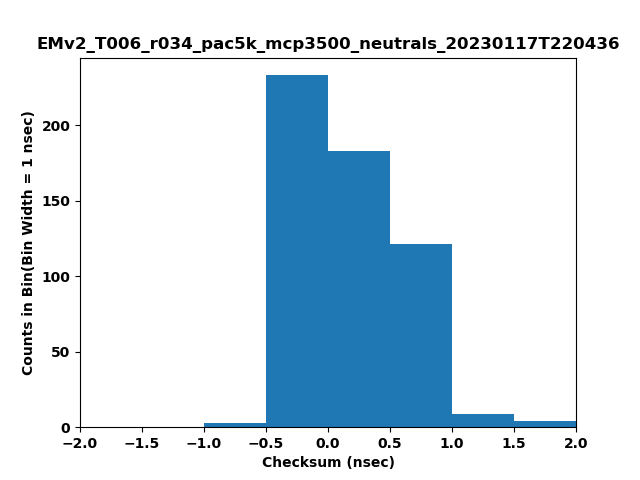

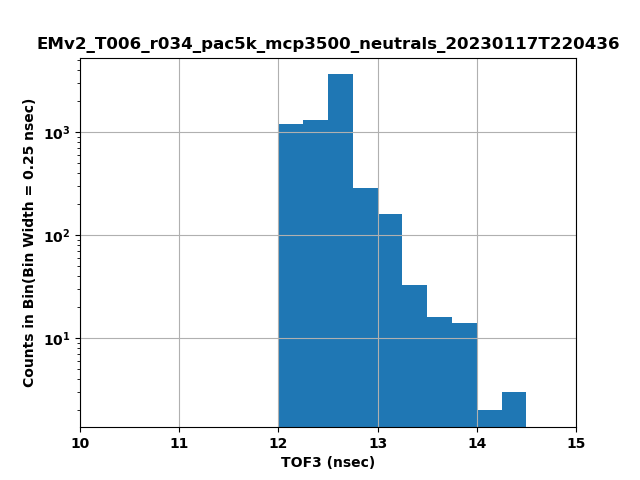

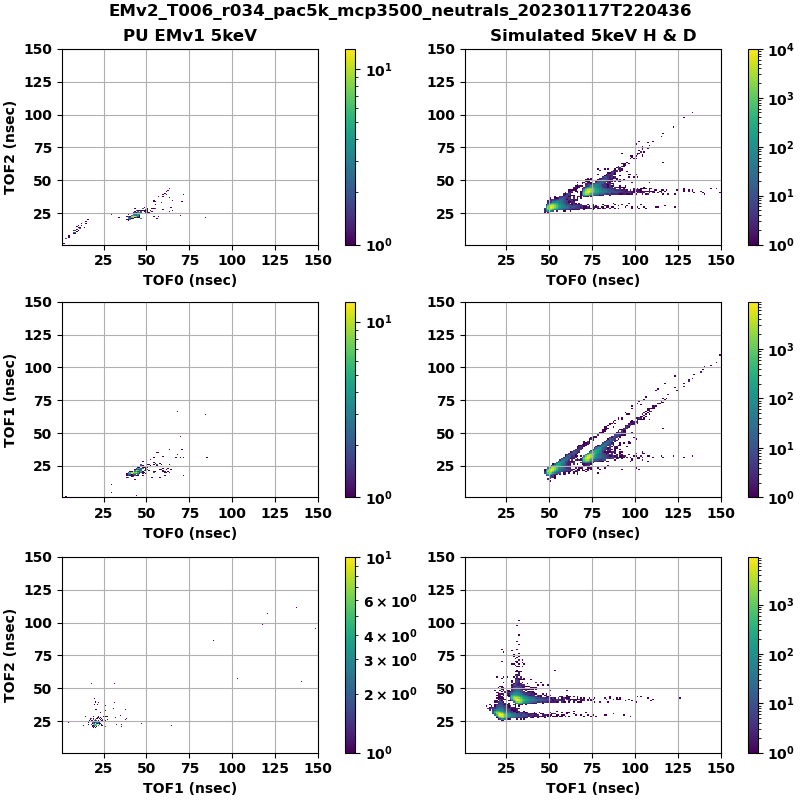

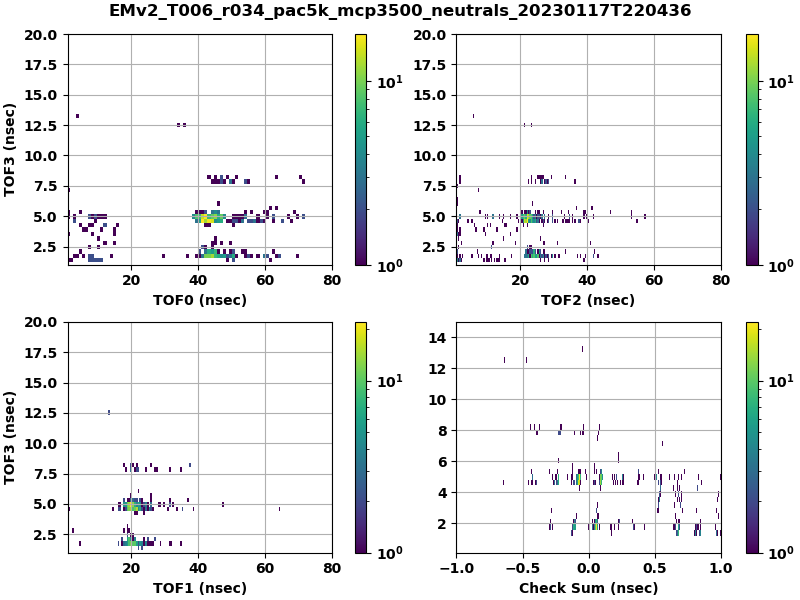

In [3]:
############################################## EMv1 PU keV Data Import and Plots##########################################



#In this cell we compare PU Data with simulations.




#The cell will need some libraries to handle arrays, and plots so we start by importing Numpy and Matplotlib respectively.
import numpy
import matplotlib.pyplot
import matplotlib.colors




# Declare list of file names to be used for comparison with simulation and eachother. 
# I hope to replace this with a glob.glob statment at some point.
# The output files will carry the file name in them so set the one you want equal to the variable file name.


# This is the only PU test in this notebook as of 12/29/2022. 
#filename_PU = 'EMv2_T006_R032_PAC5K_MCP3500_Dwell_10min_ILO_RAW_DE_20230117T211955_.csv'
filename_PU = 'EMv2_T006_r034_pac5k_mcp3500_neutrals_ILO_RAW_DE_20230117T220436_.csv'
plot_filename_PU= 'EMv2_T006_r034_pac5k_mcp3500_neutrals_20230117T220436'

# This variable is set to the file we intend to compare with a simulation.
filename=filename_PU

plot_filename=plot_filename_PU



# Import simulation files and turn into arrays to use in vizualisations.
Htrips=get_sim_arr(r'D:/aaly/laptop_MSI/OneDrive - USNH/IMAP_work/EM_v1_TOF_Analysis/5keV_PU_UNH/H/triple_events_simulated_H.txt')
Dtrips=get_sim_arr(r'D:/aaly/laptop_MSI/OneDrive - USNH/IMAP_work/EM_v1_TOF_Analysis/5keV_PU_UNH/D/triple_events_simulated.txt')

# Combine H and D simulations into a combined array. 
# This what will be used in the simulation visualizations in this this cell.

combotrips=numpy.append(Htrips,Dtrips,axis=0)


#plot checksum and tof3 for finding the cutoff and delayline length respectively. 
matplotlib.pyplot.close()
#fig, axs = matplotlib.pyplot.subplots(1,2, figsize=(8, 5), constrained_layout=True)
plot_check_sum(filename, zoom=True,runname=plot_filename, save=True, bnrange=(-100,100))

plot_tof_3(filename,zoom=2,plot_filename=plot_filename, save=True)




# Import PU test data file into an array to use for plotting and fitting.
test_data=get_data_from_csv(filename)
print("imported shape = ", test_data.shape)
print("imported sample = ", test_data[:3,:])

# Clean the test data to get golden triples for peak identification.
test_data=clean_dat(test_data,valarr=[1,1,1,1],chksm_cut=2)
print("clean shape = ",test_data.shape)






# plot test data and sims TOF0 vs TOF2.

fig1, axs1=matplotlib.pyplot.subplots(3,2,figsize=(8, 8), constrained_layout=True)
fig1.suptitle(plot_filename)


im00=plot_2d_data(test_data, tofij=[0,2], xlims=[1,150],ylims=[1,150], runname='PU 5kev', axis=axs1[0,0])
axs1[0,0].set_title( 'PU EMv1 5keV')
axs1[0,0].set_ylabel( 'TOF2 (nsec)')
axs1[0,0].set_xlabel('TOF0 (nsec)')
fig1.colorbar(im00[3], ax=axs1[0,0])


im01=plot_2d_SIMS(combotrips, tofij=[0,2], xlims=[1,150],ylims=[1,150], runname='SIMS H & D', axis=axs1[0,1])
axs1[0,1].set_title( 'Simulated 5keV H & D')
axs1[0,1].set_xlabel('TOF0 (nsec)')
fig1.colorbar(im01[3], ax=axs1[0,1])

im10=plot_2d_data(test_data, tofij=[0,1], xlims=[1,150],ylims=[1,150], runname='PU 5kev', axis=axs1[1,0])
axs1[1,0].set_xlabel( 'TOF0 (nsec)')
axs1[1,0].set_ylabel( 'TOF1 (nsec)')
fig1.colorbar(im10[3], ax=axs1[1,0])


im11=plot_2d_SIMS(combotrips, tofij=[0,1], xlims=[1,150],ylims=[1,150], runname='SIMS H & D', axis=axs1[1,1])
axs1[1,1].set_xlabel('TOF0 (nsec)')
fig1.colorbar(im11[3], ax=axs1[1,1])

im20=plot_2d_data(test_data, tofij=[1,2], xlims=[1,150],ylims=[1,150], runname='PU 5kev', axis=axs1[2,0])
axs1[2,0].set_xlabel( 'TOF1 (nsec)')
axs1[2,0].set_ylabel( 'TOF2 (nsec)')
fig1.colorbar(im20[3], ax=axs1[2,0])


im21=plot_2d_SIMS(combotrips, tofij=[1,2], xlims=[1,150],ylims=[1,150], runname='SIMS H & D', axis=axs1[2,1])
axs1[2,1].set_xlabel('TOF1 (nsec)')
fig1.colorbar(im21[3], ax=axs1[2,1])

fig1.savefig('PU_0v2_2D_'+plot_filename+'.png')
#fig1.show()
#matplotlib.pyplot.close()


# TOF3 tile zoom.

fig2, axs2=matplotlib.pyplot.subplots(2,2,figsize=(8, 6), constrained_layout=True)
fig2.suptitle(plot_filename)

img00=plot_2d_data(test_data, tofij=[0,3], xlims=[1,80],ylims=[1,20], runname='PU 5keV',  axis=axs2[0,0])
axs2[0,0].set_xlabel('TOF0 (nsec)')
axs2[0,0].set_ylabel('TOF3 (nsec)')
fig2.colorbar(img00[3], ax=axs2[0,0])


img10=plot_2d_data(test_data, tofij=[1,3], xlims=[1,80],ylims=[1,20], runname='PU 5keV', axis=axs2[1,0])
axs2[1,0].set_xlabel('TOF1 (nsec)')
axs2[1,0].set_ylabel('TOF3 (nsec)')
fig2.colorbar(img10[3], ax=axs2[1,0])

img01=plot_2d_data(test_data, tofij=[2,3], xlims=[1,80],ylims=[1,20], runname='PU 5keV', axis=axs2[0,1])
axs2[0,1].set_xlabel('TOF2 (nsec)')
fig2.colorbar(img01[3], ax=axs2[0,1])


img11=plot_2d_data(test_data, tofij=[4,3], xlims=[-1,1],ylims=[.1,15], runname='PU 5keV', axis=axs2[1,1])
axs2[1,1].set_xlabel('Check Sum (nsec)')
fig2.colorbar(img10[3], ax=axs2[1,1])




fig2.savefig('PU_TOF3_2D'+plot_filename+'_zoom.png')


